In [2]:
# Use our weather data we covered in Monday’s class and covert those three elements (day, temp, description) 
# into a CSV (1pt). 
import requests
import json
import csv
import pandas as pd

lat = "38.8894"
lon = "-77.0352"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/38.8894,-77.0352',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-77.0352, 38.8894]},
 'properties': {'@id': 'https://api.weather.gov/p

In [5]:
forecast = json_file['properties']['forecast']
new_request = requests.get(forecast)

json = new_request.json()
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-77.0369962, 38.900789],
    [-77.0407548, 38.878836500000006],
    [-77.0125519, 38.8759086],
    [-77.0087876, 38.897860800000004],
    [-77.0369962, 38.900789]]]},
 'properties': {'updated': '2023-03-20T23:29:41+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-21T02:06:27+00:00',
  'updateTime': '2023-03-20T23:29:41+00:00',
  'validTimes': '2023-03-20T17:00:00+00:00/P7DT8H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 6.096},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-03-20T22:00:00-04:00',
    'endTime': '2023-03-21T06:00:00-04:00',
   

In [6]:
data_file = open("weather_data.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Day", "Temperature(F)", "Forecast"])

a = json['properties']['periods']
counter = 0
for x in a:
    day = json['properties']['periods'][counter]['name']

    temp = json['properties']['periods'][counter]['temperature']

    forecast = json['properties']['periods'][counter]['detailedForecast']

    csv_writer.writerow([day, temp, forecast])
    counter += 1

                         
sheet = pd.read_csv("weather_data.csv")
sheet

,Day,Temperature(F),Forecast
0,Tonight,34,"Clear, with a low around 34. Southwest wind ar..."
1,Tuesday,62,"Mostly sunny, with a high near 62. Southwest w..."
2,Tuesday Night,42,"Mostly cloudy, with a low around 42. South win..."
3,Wednesday,61,A slight chance of rain showers after 8am. Mos...
4,Wednesday Night,49,"A chance of rain showers. Mostly cloudy, with ..."
5,Thursday,76,A chance of rain showers before 2pm. Mostly cl...
6,Thursday Night,57,A chance of rain showers after 2am. Mostly clo...
7,Friday,66,"Rain showers likely. Mostly cloudy, with a hig..."
8,Friday Night,49,"Rain showers likely. Mostly cloudy, with a low..."
9,Saturday,66,"Rain showers likely before 2pm, then showers a..."


<function matplotlib.pyplot.show(close=None, block=None)>

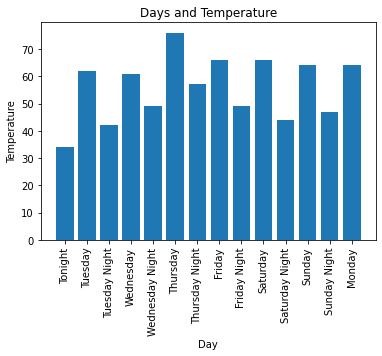

In [8]:
# Using the techniques covered in this slide deck, 
# convert that CSV into a bar graph – y axis should be the temperature, x axis should be the day (3pts)

from matplotlib import pyplot as plt
import numpy as np

df = pd.DataFrame(sheet)
temperature = df["Temperature(F)"]
day_column = df["Day"]

fig = plt.figure()
plt.bar(day_column, temperature)

plt.xlabel("Day")
plt.xticks(rotation=90) # bonus: I remember using this for my HARP 150 final project, but I believe it was
# from the matplotlib documentation! 
plt.ylabel("Temperature")
plt.title("Days and Temperature")
plt.show

In [20]:
# Read through the documentation of this public holiday API. 
# There are seven different calls listed there, use all seven of them.
# Use comments to explain how the API is working & what each call is accomplishing. 
# (You’ll need to use country codes) (4pts). 

US_info = requests.get("https://date.nager.at/api/v3/CountryInfo/US")
print(US_info.text) # returns the Country Info 

print(" ")

US_LongWeekend = requests.get("https://date.nager.at/api/v3/LongWeekend/2023/US")
print(US_LongWeekend.text) # returns the long weekends and their start and end dates. 

print(" ")

US_Holidays = requests.get("https://date.nager.at/api/v3/PublicHolidays/2023/US")
print(US_Holidays.text) # returns the names of the public holidays in the US 

print(" ")

Today_holiday = requests.get("https://date.nager.at/api/v3/IsTodayPublicHoliday/US?offset=0")
print(Today_holiday) # returns whether today is a holiday or not. Response 204 indicates that Today is not a 
# public holiday, while Response 200 would indicate the opposite. 

print(" ")

holidays_in_year = requests.get("https://date.nager.at/api/v3/NextPublicHolidays/US")
print(holidays_in_year.text) # returns all of the upcoming holidays in the next year 

print(" ")

worldwide_holidays = requests.get("https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
print(worldwide_holidays.text) # returns all of the holidays across the world within the next 7 days

{"commonName":"United States","officialName":"United States of America","countryCode":"US","region":"Americas","borders":[{"commonName":"Canada","officialName":"Canada","countryCode":"CA","region":"Americas","borders":null},{"commonName":"Mexico","officialName":"United Mexican States","countryCode":"MX","region":"Americas","borders":null}]}
 
[{"startDate":"2022-12-31","endDate":"2023-01-02","dayCount":3,"needBridgeDay":false},{"startDate":"2023-01-14","endDate":"2023-01-16","dayCount":3,"needBridgeDay":false},{"startDate":"2023-02-18","endDate":"2023-02-20","dayCount":3,"needBridgeDay":false},{"startDate":"2023-05-27","endDate":"2023-05-29","dayCount":3,"needBridgeDay":false},{"startDate":"2023-06-17","endDate":"2023-06-19","dayCount":3,"needBridgeDay":false},{"startDate":"2023-07-01","endDate":"2023-07-04","dayCount":4,"needBridgeDay":true},{"startDate":"2023-09-02","endDate":"2023-09-04","dayCount":3,"needBridgeDay":false},{"startDate":"2023-11-10","endDate":"2023-11-12","dayCount":

In [76]:
# Then I want you to build a program that gets public holiday info from 10 countries 
# of your choosing in an efficient way.  
# Count the total number of holidays and store that info. (3pts) Be careful, 
# some countries might not have holidays listed in the API!

#1. 
counter = 0
denmark_holidays = requests.get("https://date.nager.at/api/v3/PublicHolidays/2023/DK")
denmark_holidays = list(denmark_holidays)
print(denmark_holidays)
print(" ")

for x in denmark_holidays:
    print(denmark_holidays[x])
    
# Honestly, I couldn't figure this question out, but here is what I tried.
# It treats the text as one big string instead of a list or  dictionary, so it was hard to go through. 
# If it's possible, could you write the correct code in the comments?
# Thank you!

[b'[{"date":"2023-01-01","localName":"Nyt\xc3\xa5rsdag","name":"New Year\'s Day","countryCode":"DK","fixed":true,"global":true,"counties":', b'null,"launchYear":null,"types":["Public"]},{"date":"2023-04-06","localName":"Sk\xc3\xa6rtorsdag","name":"Maundy Thursday","countryCode', b'":"DK","fixed":false,"global":true,"counties":null,"launchYear":null,"types":["Public"]},{"date":"2023-04-07","localName":"Langf', b'redag","name":"Good Friday","countryCode":"DK","fixed":false,"global":true,"counties":null,"launchYear":null,"types":["Public"]}', b',{"date":"2023-04-09","localName":"P\xc3\xa5skedag","name":"Easter Sunday","countryCode":"DK","fixed":false,"global":true,"counties":n', b'ull,"launchYear":null,"types":["Public"]},{"date":"2023-04-10","localName":"2. P\xc3\xa5skedag","name":"Easter Monday","countryCode":"', b'DK","fixed":false,"global":true,"counties":null,"launchYear":null,"types":["Public"]},{"date":"2023-05-05","localName":"Store be', b'dedag","name":"General Prayer Day","count

TypeError: list indices must be integers or slices, not bytes